In [84]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm_notebook
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [12,8]

In [51]:
fnames = sorted(os.listdir('phi_vars'), key=lambda f: float(f.split('_')[1]))

Fg_rs = []
Fg_phis = []
Fg_zs = []
means = []
stds = []
seps = np.linspace(5, 500, 100)

for fname in tqdm_notebook(fnames):
    Fg = np.load('phi_vars/'+fname)
    Fg_r = Fg[:,0]
    Fg_phi = Fg[:,1]
    Fg_z = Fg[:,2]
    
    Fg_rs.append(Fg_r)
    Fg_phis.append(Fg_phi)
    Fg_zs.append(Fg_z)
    
    means.append(np.mean(Fg_phi))
    stds.append(np.std(Fg_phi))

In [66]:
Fg_rs = np.array(Fg_rs)
Fg_phis = np.array(Fg_phis)
Fg_zs = np.array(Fg_zs)

In [52]:
def model(x, *params):
    a,b,c = params
    return a+b*np.power(x,c)

mpopt, mpcov = curve_fit(model, seps, np.abs(means)*1e24, p0=[0, 1, -2])
spopt, spcov = curve_fit(model, seps, np.array(stds)*1e24, p0=[0, 1, -2])

In [53]:
mpopt, spopt

(array([ 1.72455965e-17,  1.47141545e-12, -3.47994452e+00]),
 array([ 5.77077089e-17,  1.09011826e-11, -2.98090376e+00]))

In [77]:
?fig.suptitle

Signature: fig.suptitle(t, **kwargs)
Docstring:
Add a centered title to the figure.

Parameters
----------
t : str
    The title text.

x : float, default 0.5
    The x location of the text in figure coordinates.

y : float, default 0.98
    The y location of the text in figure coordinates.

horizontalalignment, ha : {'center', 'left', right'}, default: 'center'
    The horizontal alignment of the text relative to (*x*, *y*).

verticalalignment, va : {'top', 'center', 'bottom', 'baseline'}, default: 'top'
    The vertical alignment of the text relative to (*x*, *y*).

fontsize, size : default: :rc:`figure.titlesize`
    The font size of the text. See `.Text.set_size` for possible
    values.

fontweight, weight : default: :rc:`figure.titleweight`
    The font weight of the text. See `.Text.set_weight` for possible
    values.


Returns
-------
    text
        The `.Text` instance of the title.


Other Parameters
----------------
fontproperties : None or dict, optional
    A dict of fo

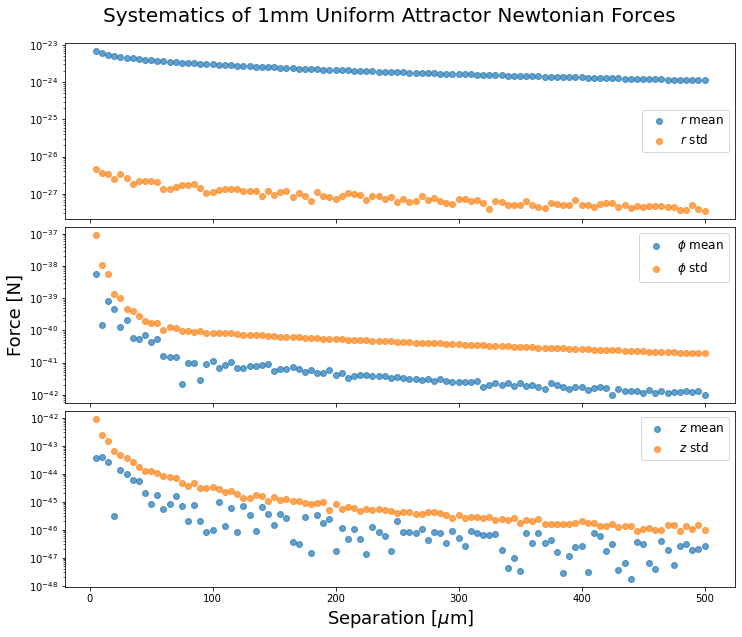

In [83]:
fig, ax = plt.subplots(3, figsize=(12,10), sharex=True)

Fgs = [Fg_rs, Fg_phis, Fg_zs]
lbls = ['$r$', r'$\phi$', '$z$']
for i, Fg in enumerate(Fgs):
    means = np.abs(np.mean(Fg, axis=1))
    stds = np.std(Fg, axis=1)
    ax[i].scatter(seps, means, alpha=0.7, label=lbls[i]+' mean')
    ax[i].scatter(seps, stds, alpha=0.7, label=lbls[i]+' std')
    ax[i].set_yscale('log')
    ax[i].legend(fontsize=12)

ax[1].set_ylabel('Force [N]', fontsize=18)
ax[2].set_xlabel('Separation [$\mu$m]', fontsize=18)
fig.suptitle('Systematics of 1mm Uniform Attractor Newtonian Forces', x=0.5, y=0.93, fontsize=20)
plt.subplots_adjust(hspace=0.05)
plt.show()

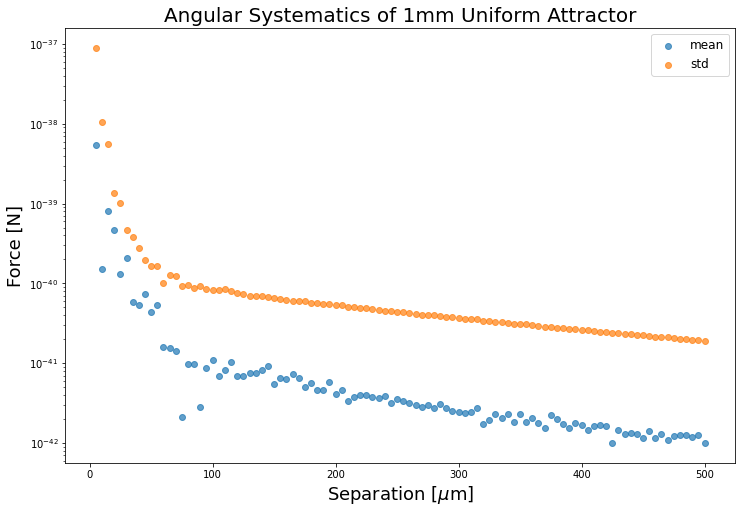

In [59]:
mfit_txt=r'mean = $-9.3+12.4\cdot{sep}^{-0.04}$'
sfit_txt=r'std = $-13.1+17.5\cdot{sep}^{-0.04}$'
plt.scatter(seps, np.abs(means), label='mean', alpha=0.7)
plt.scatter(seps, stds, label='std', alpha=0.7)
plt.yscale('log')
# plt.plot(seps, model(seps, *mpopt)*1e-24, label='mean fit')
# plt.plot(seps, model(seps, *spopt)*1e-24, label='std fit')
# plt.text(200, 2.5e-24, mfit_txt, fontsize=15)
# plt.text(200, 2.3e-24, sfit_txt, fontsize=15)
plt.xlabel('Separation [$\mu$m]', fontsize=18)
plt.ylabel('Force [N]', fontsize=18)
plt.legend(fontsize=12)
plt.title('Angular Systematics of 1mm Uniform Attractor', fontsize=20)
plt.show()

In [50]:
Fg_phis[0][:,0].size

25

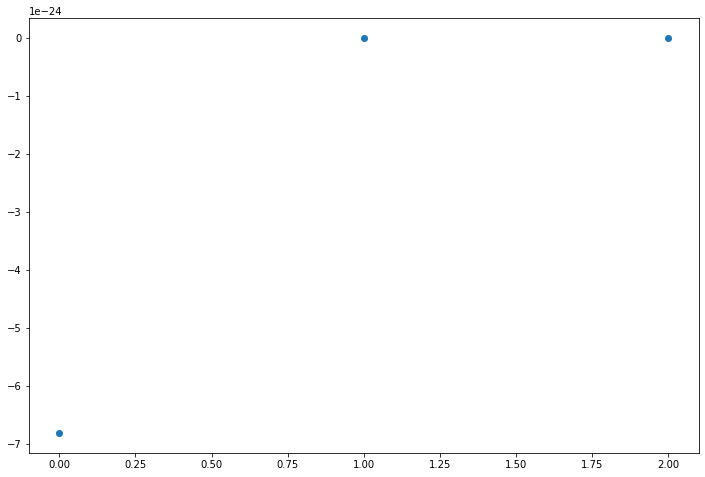

In [45]:
plt.plot(Fg_phis[0][0], 'o')